In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2  # OpenCV para leer imágenes
import seaborn

import torch

cuda = torch.cuda.is_available()
print("GPU:", cuda)

GPU: True


In [7]:
import os
import cv2
import numpy as np

# Ruta de la carpeta del dataset
dataset_folder = 'F:\\PlantVillage-Dataset\\PlantVillage-Dataset\\raw\\grayscale'

# Lista de carpetas específicas que deseas cargar
carpetas_seleccionadas = [
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___healthy',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold'
]
#se define la carpeta adelante de la carpeta donde esta el dataset|
output_folder = 'F:\\PlantVillage-Dataset\\Processed_Images'
os.makedirs(output_folder, exist_ok=True)

# Guardar las imágenes como archivos individuales
for carpeta in carpetas_seleccionadas:
    ruta_carpeta = os.path.join(dataset_folder, carpeta)

    if os.path.exists(ruta_carpeta) and os.path.isdir(ruta_carpeta):
        archivos_en_carpeta = os.listdir(ruta_carpeta)
        print(f"Archivos en {carpeta}: {len(archivos_en_carpeta)}")

        for idx, archivo in enumerate(archivos_en_carpeta):
            ruta_archivo = os.path.join(ruta_carpeta, archivo)
            imagen = cv2.imread(ruta_archivo)

            #crear data frame y

        if imagen is not None:
            output_path = os.path.join(output_folder, f"{carpeta}_{idx}.npy")
            np.save(output_path, imagen)

    else:
        print(f"La carpeta {carpeta} no existe en el dataset.")


Archivos en Tomato___Septoria_leaf_spot: 1771
Archivos en Tomato___Spider_mites Two-spotted_spider_mite: 1676
Archivos en Tomato___Target_Spot: 1404
Archivos en Tomato___Tomato_mosaic_virus: 373
Archivos en Tomato___Tomato_Yellow_Leaf_Curl_Virus: 5357
Archivos en Tomato___Bacterial_spot: 2127
Archivos en Tomato___Early_blight: 1000
Archivos en Tomato___healthy: 1591
Archivos en Tomato___Late_blight: 1909
Archivos en Tomato___Leaf_Mold: 952


In [11]:
import pandas as pd
import glob

# Listar los archivos guardados
archivos_imagenes = glob.glob(os.path.join(output_folder, '*.npy'))

# Cargar las imágenes por lotes
# si se queda sin memoria la maquina bajar el batch size
batch_size = 100
datos_imagenes = []

for idx, archivo in enumerate(archivos_imagenes):
    print(f"Cargando archivo {idx + 1} de {len(archivos_imagenes)}: {archivo}")
    imagen = np.load(archivo)
    imagen = imagen[:, :, 0]

    imagen_aplanada = imagen.flatten()
    datos_imagenes.append(imagen_aplanada)

    if (idx + 1) % batch_size == 0 or (idx + 1) == len(archivos_imagenes):
        df_batch = pd.DataFrame(datos_imagenes)
        if idx == batch_size - 1:
            df_imagenes = df_batch
        else:
            df_imagenes = pd.concat([df_imagenes, df_batch], ignore_index=True)
        datos_imagenes = []

# Verificar la forma del DataFrame resultante
print("Forma del DataFrame de imágenes:", df_imagenes.shape)


Cargando archivo 1 de 18160: F:\PlantVillage-Dataset\Processed_Images\Tomato___Bacterial_spot_0.npy
Cargando archivo 2 de 18160: F:\PlantVillage-Dataset\Processed_Images\Tomato___Bacterial_spot_1.npy
Cargando archivo 3 de 18160: F:\PlantVillage-Dataset\Processed_Images\Tomato___Bacterial_spot_10.npy
Cargando archivo 4 de 18160: F:\PlantVillage-Dataset\Processed_Images\Tomato___Bacterial_spot_100.npy
Cargando archivo 5 de 18160: F:\PlantVillage-Dataset\Processed_Images\Tomato___Bacterial_spot_1000.npy
Cargando archivo 6 de 18160: F:\PlantVillage-Dataset\Processed_Images\Tomato___Bacterial_spot_1001.npy
Cargando archivo 7 de 18160: F:\PlantVillage-Dataset\Processed_Images\Tomato___Bacterial_spot_1002.npy
Cargando archivo 8 de 18160: F:\PlantVillage-Dataset\Processed_Images\Tomato___Bacterial_spot_1003.npy
Cargando archivo 9 de 18160: F:\PlantVillage-Dataset\Processed_Images\Tomato___Bacterial_spot_1004.npy
Cargando archivo 10 de 18160: F:\PlantVillage-Dataset\Processed_Images\Tomato___Ba

In [12]:
# Guardar el DataFrame como un archivo CSV
ruta_archivo_csv = 'F:\\PlantVillage-Dataset\\df_plant_Village\\df_plant_Village_sin_2_canales.csv'  # Reemplaza con la ruta y nombre de archivo deseado

# Guardar el DataFrame como CSV sin incluir el índice
df_imagenes.to_csv(ruta_archivo_csv, index=False)

print("DataFrame de imágenes guardado como CSV en:", ruta_archivo_csv)


DataFrame de imágenes guardado como CSV en: F:\PlantVillage-Dataset\df_plant_Village\df_plant_Village_sin_2_canales.csv


In [13]:
df_imagenes.head()

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,144,146,148,150,151,150,148,147,145,140,...,122,116,107,117,119,113,114,121,120,111
1,102,95,104,103,110,120,112,117,116,119,...,169,171,164,176,168,157,160,154,154,172
2,125,124,118,114,115,120,120,116,109,115,...,165,165,159,160,161,160,158,157,158,159
3,125,129,129,125,124,129,132,133,131,131,...,157,155,161,159,156,154,155,155,155,155
4,165,165,167,167,162,158,161,168,164,163,...,103,105,117,115,112,113,114,114,110,107


In [14]:
 #Splitting train dataset into X and Y.Normalizing it by dividing it with 255

X = df_imagenes.iloc[:, 1:].values / 256
Y = df_imagenes.iloc[:, 0].values

(65535,)


TypeError: Invalid shape (1,) for image data

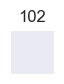

In [ ]:
from sklearn.model_selection import train_test_split

trn_x, val_x, trn_y, val_y = train_test_split(X, Y, test_size=0.2)

In [ ]:
#converting our data into a datloader object.

trn_x = torch.from_numpy(trn_x).type(torch.FloatTensor)
trn_y = torch.from_numpy(trn_y).type(torch.LongTensor)

val_x = torch.from_numpy(val_x).type(torch.FloatTensor)
val_y = torch.from_numpy(val_y).type(torch.LongTensor)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

trn = TensorDataset(trn_x, trn_y)
val = TensorDataset(val_x, val_y)

trn = DataLoader(trn, batch_size=1000)
val = DataLoader(val, batch_size=1000)

In [ ]:
shape = trn_x[0].shape
shape

torch.Size([784])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(65536, 512)  #esta es la entrada de la red neuronal
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 10)

    def forward(self, X):
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = self.linear3(X)
        return F.log_softmax(X, dim=1)


mlp = Model()

if cuda:
    mlp.cuda()

print(mlp)

Model(
  (linear1): Linear(in_features=784, out_features=250, bias=True)
  (linear2): Linear(in_features=250, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
#define our optimizer
from torch.optim import Adam

optimizer = Adam(mlp.parameters(), lr=1e-3)

In [ ]:
def compute_val_loss(val_x, val_y, model):
    if cuda:
        val_x, val_y = val_x.cuda(), val_y.cuda()
    output = model(val_x)
    loss = F.cross_entropy(output, val_y)
    return loss

In [ ]:
EPOCHS = 2

trn_loss = []
val_loss = []

mlp.train()

for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(trn):

        if cuda:
            data, target = data.cuda(), target.cuda()

        optimizer.zero_grad()

        y_pred = mlp(data)

        loss = F.cross_entropy(y_pred, target)
        trn_loss.append(loss.cpu().data.item())

        loss.backward()
        optimizer.step()

        loss = compute_val_loss(val_x, val_y, mlp)
        val_loss.append(loss.cpu().data.item())

    print("Epoch: {} | loss: {} | val_loss: {}".format(epoch + 1, trn_loss[-1], val_loss[-1]))

Epoch: 1 | loss: 0.35565581917762756 | val_loss: 0.3581877052783966
Epoch: 2 | loss: 0.25579801201820374 | val_loss: 0.26609671115875244
Epoch: 3 | loss: 0.2067803293466568 | val_loss: 0.22754785418510437
Epoch: 4 | loss: 0.170864537358284 | val_loss: 0.1973186582326889
Epoch: 5 | loss: 0.148243710398674 | val_loss: 0.17556650936603546
Epoch: 6 | loss: 0.1292995661497116 | val_loss: 0.1588653326034546
Epoch: 7 | loss: 0.1130184680223465 | val_loss: 0.14535991847515106
Epoch: 8 | loss: 0.09896637499332428 | val_loss: 0.13379305601119995
Epoch: 9 | loss: 0.08698887377977371 | val_loss: 0.12423226982355118
Epoch: 10 | loss: 0.07717505842447281 | val_loss: 0.11576734483242035


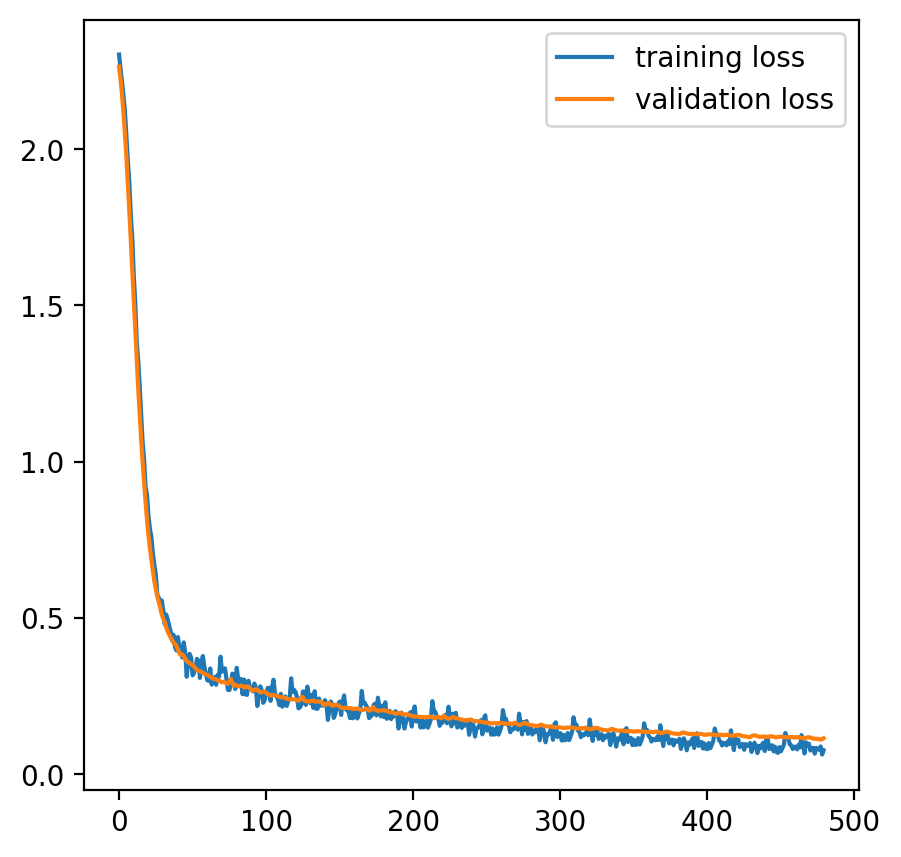

In [ ]:
plt.figure(figsize=(5, 5), dpi=200)
plt.plot(trn_loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.legend(loc='upper right')

In [ ]:
def predict_with_pytorch(model, val_x):
    y_preds = []

    if cuda:
        val_x = val_x.cuda()

    out = model(val_x)
    _, predicted = torch.max(out.data, 1)

    for p in predicted:
        y_preds.append(p.detach().cpu().numpy().item())

    return y_preds

In [ ]:
#predicting validation set and plotting a heatmap.

pred = predict_with_pytorch(mlp, val_x)

In [ ]:
val_x.numpy()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(val_y.numpy(), pred)

<Axes: >

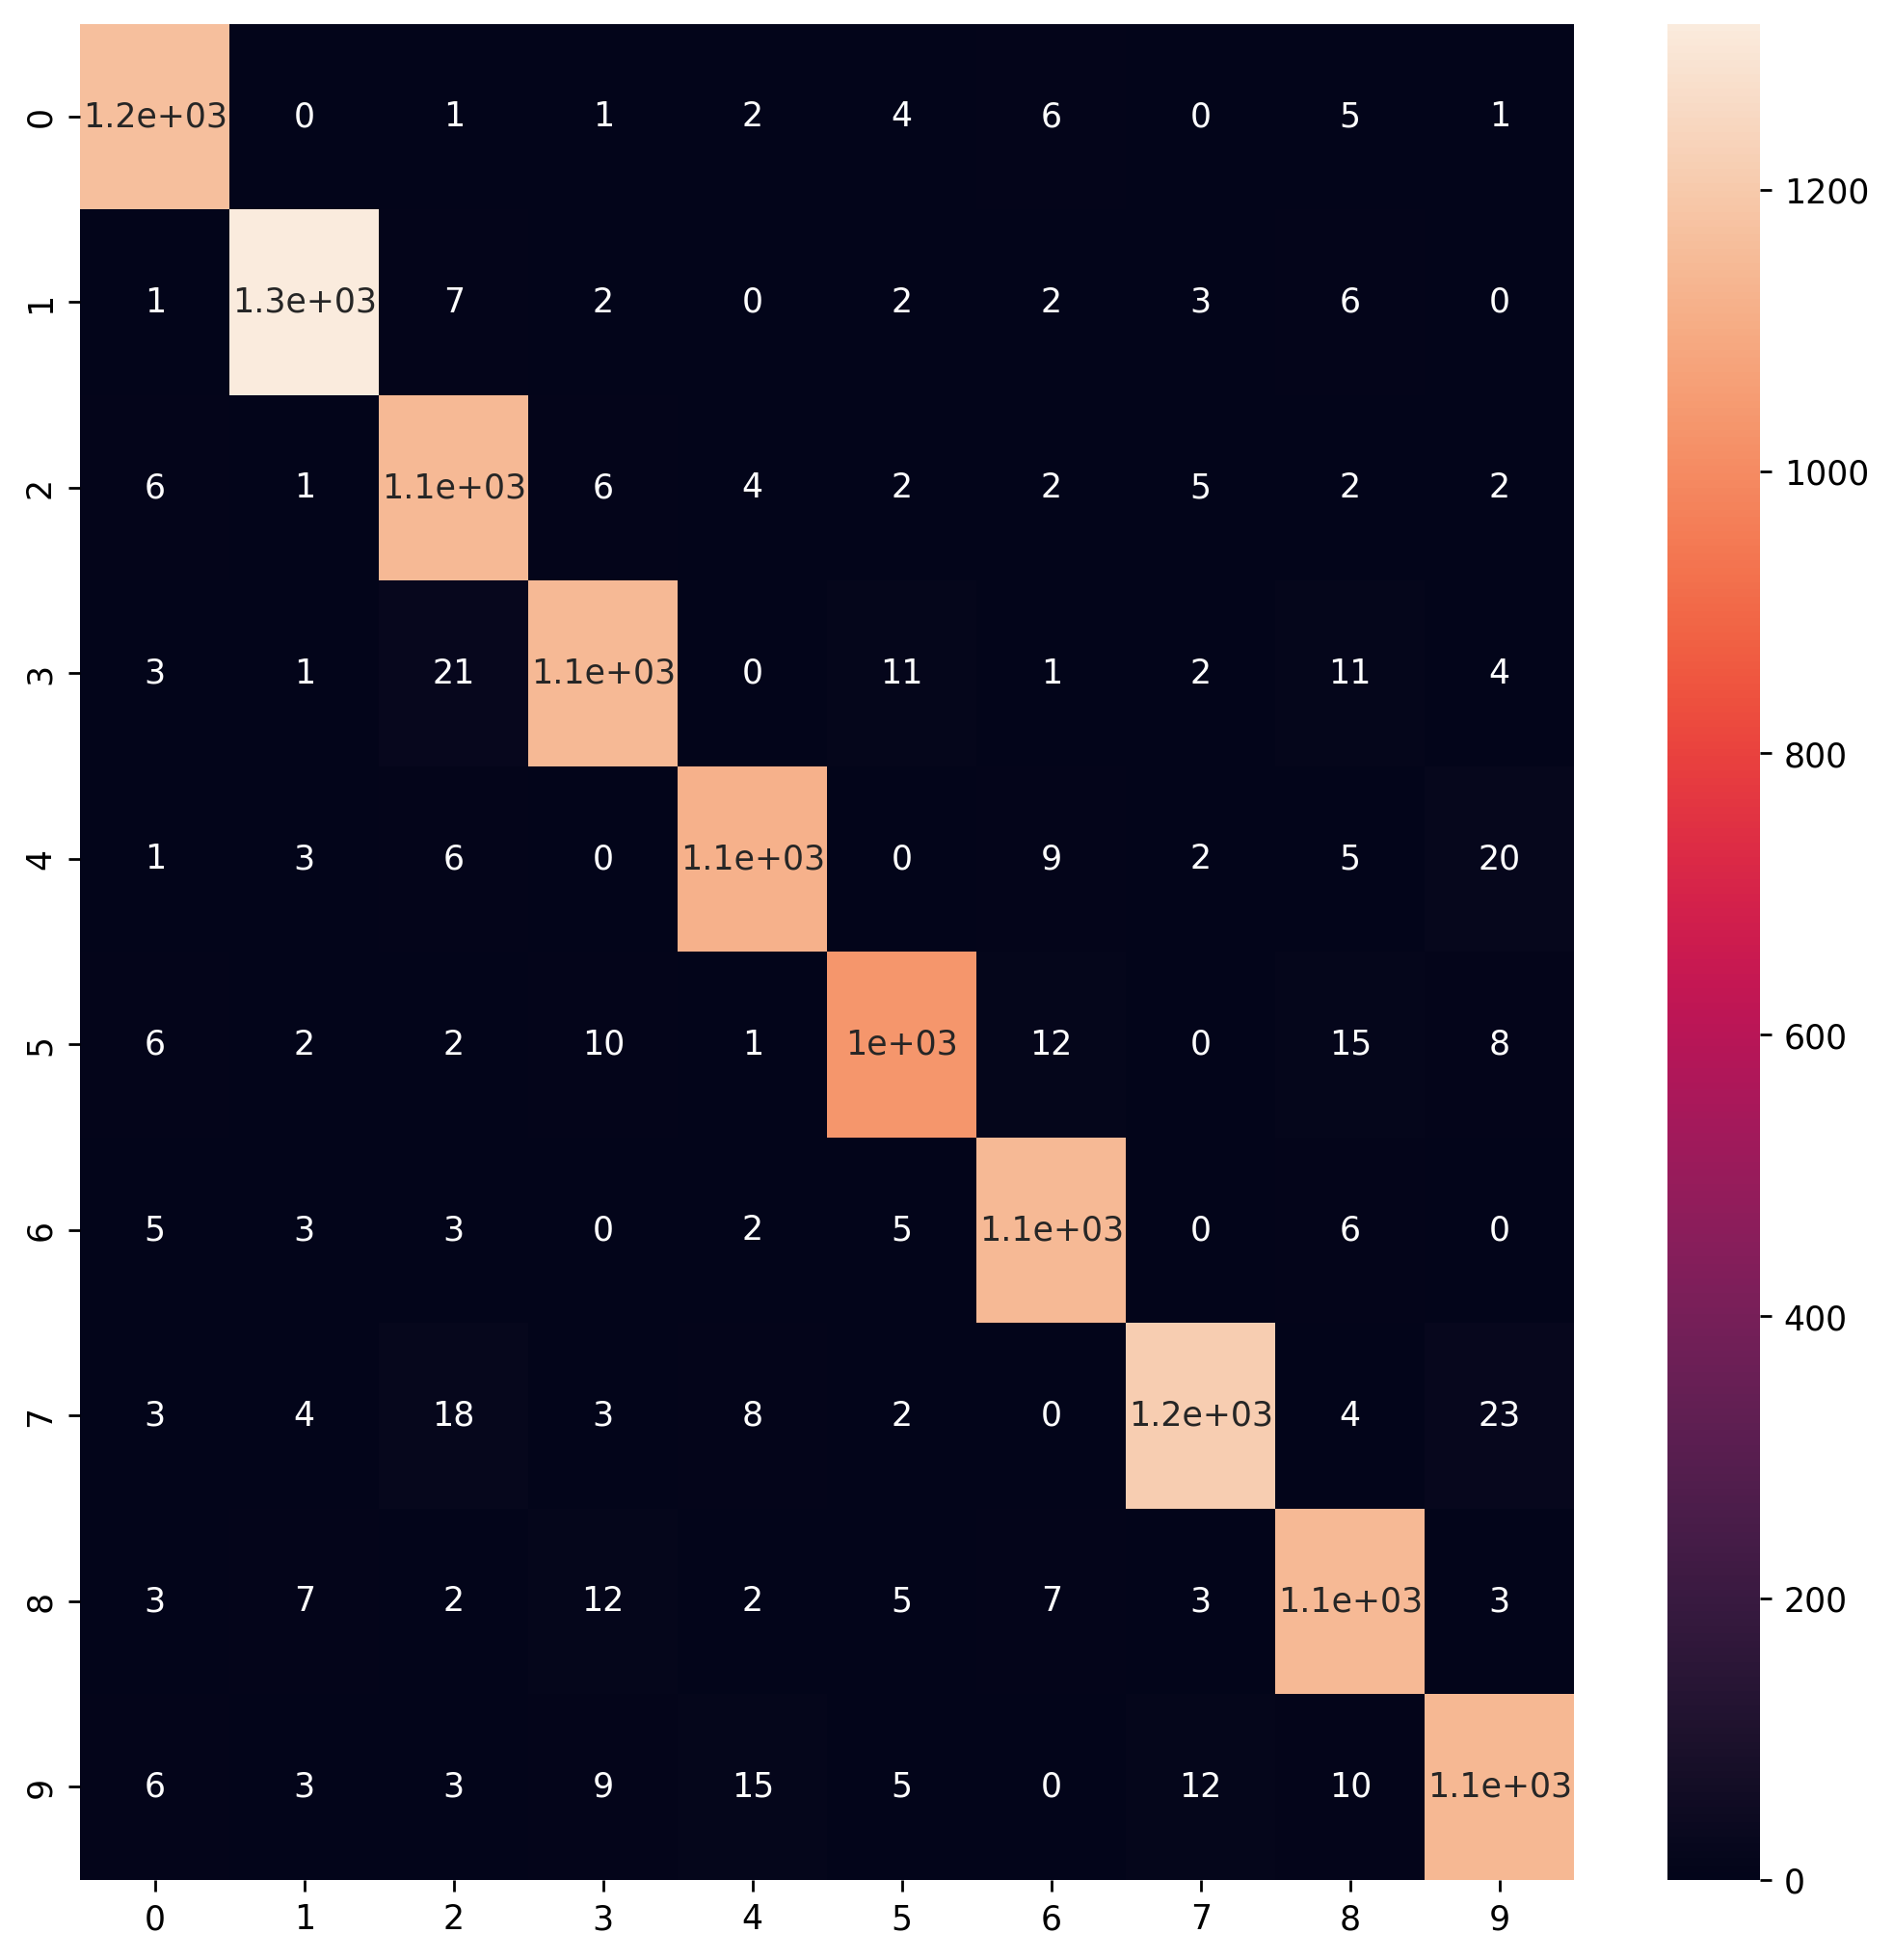

In [ ]:
plt.figure(figsize=(10, 10), dpi=250)
seaborn.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(val_y.numpy(), pred)

print("Accuracy:", acc * 100, "%")

Accuracy: 96.45833333333333 %
